Name of Members:

- __APA, GIUSIPPI MARIA II DEL ROSARIO__
- __OBEJERO, REY FERBS MAGALLON__
- __RAMIREZ, BENMAR SIM GREFALDA__
- __RAMOS, RONN PATRICK BICERA__

## I. Introduction

The dataset we chose for this machine project is the "Sports" dataset. 

Our project will have us go through the process of selecting a dataset, describing it, performing EDA, data preprocessing and cleaning, model training, HP tuning, model selection, and extracting insights from the data.

We aim to leverage the data from the soccer matches to preduct the number of goals that will be scored during the remaining playtime. The target of this project is regression as we aim to predict a continous outcome, which is the **number of goals to be scored** during the remaining time.

We will implement the use of machine learning and other techniques taught in class to build our predictive model.

## II. Description

The dataset is related to soccer matches and will be used to predict how many goals will be scored during the remaining match time. The dataset contains 10,000 such snapshots, each taken at a different, random point in time during a match. 

In the context of this dataset, a “snapshot” refers to a set of data points captured at a specific moment during a soccer match.

As for the collection process, it can be inferred that the data might have been collected in real-time during this soccer match, capturing various events and statistics at different timestamps. This data would allow for more accurate predictions of future events based on the current state of the match, and whether it is best to bet on over or under a certain number of goals.

There are only 7000 instances(rows) and 21 features(columns) in the dataset. Each of the features are statistics of both events for the home and away team.

### List of Variables

| **Variable Name** | **Description**|
|--------------------------------------|----------------|
|**uuid** | Snapshot’s unique ID|
|**current_minute** | Match’s current minute, including 15 min half-time|
|**home_score and away_score** | Home and away team’s goals.|
|**home_yellow_cards and away_yellow_cards**| Home and away team’s yellow cards.|
|**home_red_cards and away_red_cards**| Home and away team’s red cards.|
|**home_attacks and away_attacks**| Home and away team’s attempted attacks.|
|**home_dangerous_attacks and away_dangerous_attacks**| Home and away team’s dangerous attacks.|
|**home_corners and away_corners**| Home and away team’s awarded corners.|
|**home_off_target and away_off_target**| Home and away team’s off-target shots.|
|**home_on_target and away_on_target**| Home and away team’s on-target shots.|
|**home_possession and away_possession** |Home and away team’s ball possession %.|

## III. Modules

For this machine project, we will utilize the following Python libraries:

- `one`:
- `two`:
- `three`:
- `four`:

In [44]:
import csv
import h5py
import math
import os
import pickle
import random
from linear_regression import AnalyticalMethod, compute_RMSE
from linear_regression import PolyFitMethod
import matplotlib.pyplot as plt
import numpy as np
from neural_network import NeuralNetwork
import pandas as pd
from scipy import misc
from sklearn import preprocessing
from sklearn.base import BaseEstimator
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import log_loss, accuracy_score, classification_report, ParameterGrid
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import torch.optim as optim
import torch.nn as nn


ModuleNotFoundError: No module named 'linear_regression'

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IV. Data Cleaning

We will now be performing various methods of preprocessing and data cleaning to enhance the dataset's usability and suitability to our exploratory analysis and model training.

This is also to ensure that the dataset will be ready for use, which means we will be checking for missing values, duplicates, outliers and other errors. Making it so that the data is in its correct representation.

In [80]:
# Importing and reading the Sports.csv
sports = pd.read_csv("sports.csv")
sports.head()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
2,549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,62,38,4
3,287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,...,25,1,0,0,2,0,0,55,45,2
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0


**Checking for Missing Values**



In [81]:
# Check each column for missing values
missing_values = sports.isnull().sum()

columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


**Checking for Duplicates**



In [82]:
# Find the duplicates
duplicate_uuids = sports.duplicated(keep=False)

# Create a dataframe for duplicates
duplicates = sports[duplicate_uuids]

# Display the rows with duplicates
print("Duplicate Entries:\n", duplicates)

# Removing the duplicates if detected in dataframe
if not duplicates.empty:
    sports = sports.drop_duplicates(keep='first')
    print("Duplicates removed. Dataset has {sports.shape[0]} rows.")
else:
    print("No duplicates found.")

Duplicate Entries:
 Empty DataFrame
Columns: [uuid, current_minute, home_score, away_score, home_yellow_cards, away_yellow_cards, home_red_cards, away_red_cards, home_attacks, away_attacks, home_dangerous_attacks, away_dangerous_attacks, home_corners, away_corners, home_off_target, away_off_target, home_on_target, away_on_target, home_possession, away_possession, final_delta]
Index: []

[0 rows x 21 columns]
No duplicates found.


**Other Cleaning Processes**

In [83]:
# Replacing any erroneous infinite values
sports = sports.replace([np.inf, -np.inf], np.nan)

# Dropping columns with more than 50% missing values
sports = sports.dropna(thresh=len(sports)*0.5, axis=1)

# Check for incorrect possession percentages
incorrect_possession_indices = sports[~(sports['home_possession'] + sports['away_possession'] == 100)].index

if len(incorrect_possession_indices) > 0:
    print("Found inconsistencies in possession data:")
    print(sports.loc[incorrect_possession_indices, ['home_possession', 'away_possession']])
else:
    print("Possession data is consistent.")

Found inconsistencies in possession data:
      home_possession  away_possession
72                 67               32
881                23               76
1084               77               22
1185               75               24
1421               33               66
1485               77               22
1950               71               28
1984               83               16
2415               30               69
2849               27               72
2895               78               21
2953               79               20
3222               31               68
3313               65               34
4065               25               74
4669               73               26
5302               78               21
5509               25               74
6299               73               26
6527               33               66
6660               72               27
6839               76               23


As you can see there are percentages that don't equate to 100, but the difference is neglible because it is only from 99 to 100 which won't cause much noise in the analysis. It isn't exactly necessary to remove it at this point of the dataset but is also another consideration we took to prepare the if ever the dataset grew larger.

**Data Type Checking**

Having appropriate data types for the values in the dataset is crucial to data analysis and model training. Luckily for us, the dataset we currently have has the appropriate values as all of the variables and their values are appropriate to their data type.

The importance of having correct data types is that we have the following:

Data Integrity,
Accuracy,
Efficiency,
Compatibility, 
and Reliability

In [84]:
# Printing all of the present data types
print("All data types present:\n", sports.dtypes)

All data types present:
 uuid                      object
current_minute             int64
home_score                 int64
away_score                 int64
home_yellow_cards          int64
away_yellow_cards          int64
home_red_cards             int64
away_red_cards             int64
home_attacks               int64
away_attacks               int64
home_dangerous_attacks     int64
away_dangerous_attacks     int64
home_corners               int64
away_corners               int64
home_off_target            int64
away_off_target            int64
home_on_target             int64
away_on_target             int64
home_possession            int64
away_possession            int64
final_delta                int64
dtype: object


### Outlier Detection and Treatment

Outliers can significantly impact statistical measures and model performance. In the context of our dataset, outliers might represent unusual game conditions, errors in data collection, or truly exceptional events. 

Surprisingly enough, there are no major outliers in our dataset, because in the dataset, varying values like attacks, cards, and accuracy are all subject to the team's playstyle and ability. 

**Our Approach**

But we performed winsorization on the dataset to make it robust against potential outliers in the future if ever there are any in the future, possibly when the dataset grows larger. By capping the data at specified percentiles we reduce the possible influed of these outliers. 

We also provided the before and after outlier treatment visualizations to identify the outliers (if there are any).

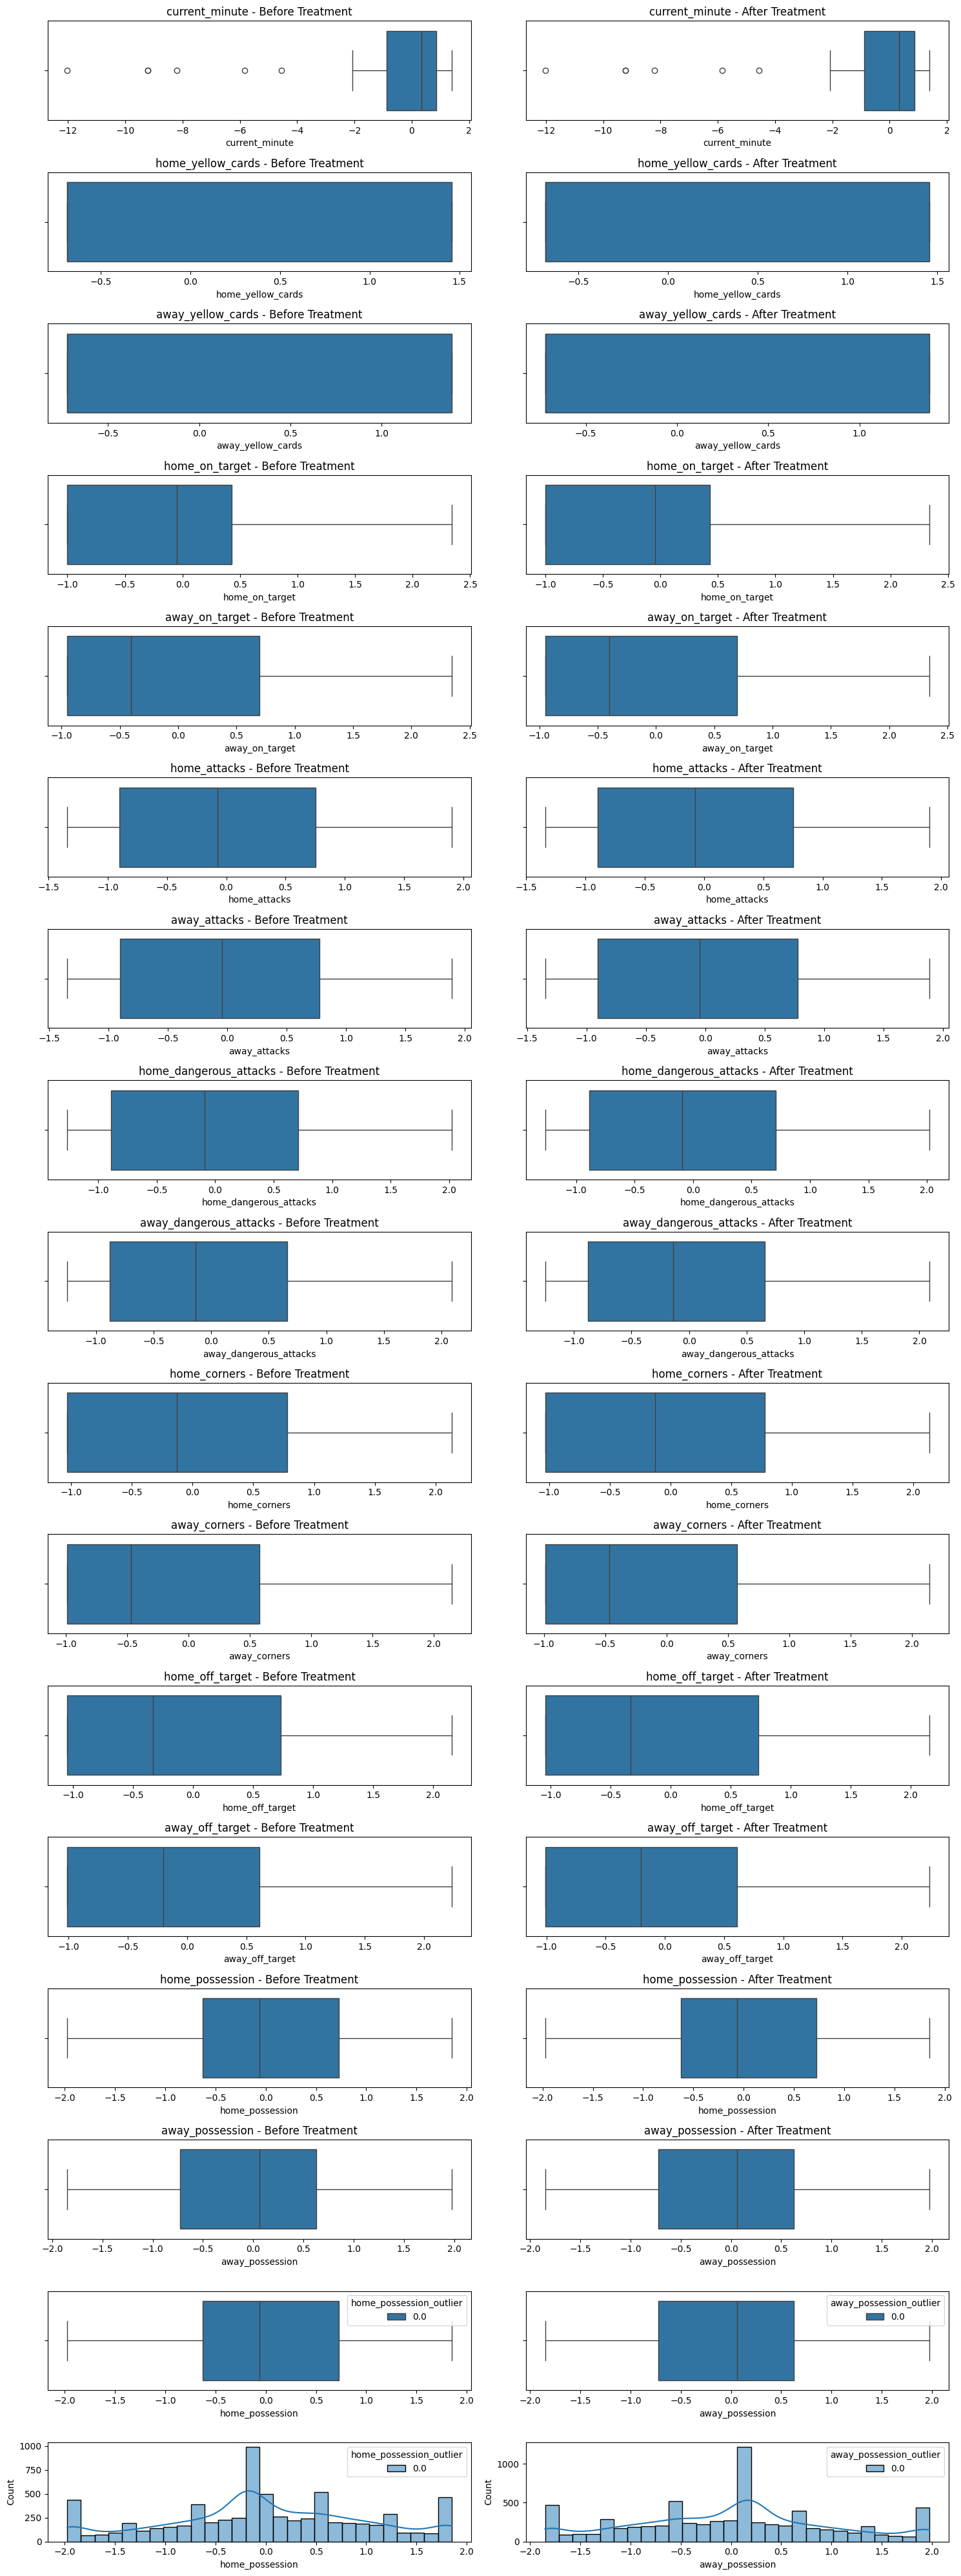

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load data from CSV
sports = pd.read_csv('sports.csv')

# Columns to check for outliers
outlier_columns = ['current_minute', 'home_yellow_cards', 'away_yellow_cards', 'home_on_target',
                   'away_on_target', 'home_attacks', 'away_attacks', 'home_dangerous_attacks',
                   'away_dangerous_attacks', 'home_corners', 'away_corners', 'home_off_target',
                   'away_off_target', 'home_possession', 'away_possession']

def winsorize(data, lower_percentile=5, upper_percentile=95):
    """Winsorizes data by capping values at specified percentiles."""
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return np.clip(data, lower_bound, upper_bound)

def truncate(data, upper_bound):
    """Truncates data by removing values exceeding the upper bound."""
    return data[data <= upper_bound]

def detect_possession_outliers(data, method='zscore', z_score_threshold=3, lower_bound=20, upper_bound=80):
    """
    Identifies outliers in home and away possession data using different methods.

    Args:
        data: Pandas DataFrame containing home_possession and away_possession columns.
        method: The outlier detection method to use ('zscore', 'percentile', 'domain').
        z_score_threshold: Threshold for Z-scores (used with 'zscore' method).
        lower_bound: Lower threshold for possession values (used with 'domain' method).
        upper_bound: Upper threshold for possession values (used with 'domain' method).

    Returns:
        A new DataFrame with additional columns indicating potential outliers.
    """
    home_possession = data['home_possession']
    away_possession = data['away_possession']

    if method == 'zscore':
        # Z-score method
        home_zscores = (home_possession - home_possession.mean()) / home_possession.std()
        away_zscores = (away_possession - away_possession.mean()) / away_possession.std()

        data['home_possession_outlier'] = np.where(np.abs(home_zscores) > z_score_threshold, True, False)
        data['away_possession_outlier'] = np.where(np.abs(away_zscores) > z_score_threshold, True, False)
    elif method == 'percentile':
        # Percentile-based method
        possession_percentile = data[['home_possession', 'away_possession']].quantile(0.01)
        data['home_possession_outlier'] = np.where(home_possession < possession_percentile['home_possession'], True, False)
        data['away_possession_outlier'] = np.where(away_possession < possession_percentile['away_possession'], True, False)
    elif method == 'domain':
        # Domain knowledge-based method
        data['home_possession_outlier'] = np.where((home_possession < lower_bound) | (home_possession > upper_bound), True, False)
        data['away_possession_outlier'] = np.where((away_possession < lower_bound) | (away_possession > upper_bound), True, False)
    else:
        raise ValueError("Invalid outlier detection method. Choose 'zscore', 'percentile', or 'domain'.")

    return data

# Handle outliers for other columns
for col in outlier_columns:
    if col == 'current_minute':
        sports[col] = truncate(sports[col], 105)
    elif col.endswith('_cards'):
        sports[col] = winsorize(sports[col], upper_percentile=80)
    else:
        sports[col] = winsorize(sports[col])

# Choose a method for possession outliers and apply it
sports = detect_possession_outliers(sports.copy(), method='domain', lower_bound=20, upper_bound=80)  # Example: using domain-based method

# Select columns for standardization (excluding uuid)
columns_to_standardize = [col for col in sports.columns if col != 'uuid']

# Create a StandardScaler object
scaler = StandardScaler()

# Apply standardization to selected columns
sports[columns_to_standardize] = scaler.fit_transform(sports[columns_to_standardize])

# Visualize distributions after outlier treatment and standardization
fig, axes = plt.subplots(nrows=len(outlier_columns) + 2, ncols=2, figsize=(15, 40))

for i, col in enumerate(outlier_columns):
    # Box plots
    sns.boxplot(data=sports, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} - Before Treatment')

    sns.boxplot(data=sports, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - After Treatment')

# Visualize possession data with outliers
sns.boxplot(data=sports, x='home_possession', ax=axes[len(outlier_columns), 0], hue='home_possession_outlier')
sns.boxplot(data=sports, x='away_possession', ax=axes[len(outlier_columns), 1], hue='away_possession_outlier')

# Histograms for possession data with outliers
sns.histplot(data=sports, x='home_possession', kde=True, ax=axes[len(outlier_columns) + 1, 0], hue='home_possession_outlier')
sns.histplot(data=sports, x='away_possession', kde=True, ax=axes[len(outlier_columns) + 1, 1], hue='away_possession_outlier')

plt.tight_layout()
plt.show()


We did boxplots and histograms for all relevant variables and utilized truncation and winsorization. 

In our current case, there are no obvious outliers, because the initial data might not have contained extreme values that would significantly impact the results. There is also the idea of playstyle variations where the teams at different current_minutes would have varying possessions, attacks, or accuracy.

Despite this, still applying outlier detection methods still offers a safety net from future outliners. We also applied standardization only to the numerical columns using StandardScaler to bring the features to a common scale, this will help us ensure that there is feature scaling and improved algorithm performance from algorithms like K-means, support vector machines, and neural networks.

### Data Transformation

**Feature Engineering**
`goals_remaining`: This is our target variable, representing the number of goals scored in the remaining time of the match.

Ratio of Attack to Goals

`home_attack_efficiency`: Measures the efficiency of the home team in converting attacks into goals.
`away_attack_efficiency`: Measures the efficiency of the away team in converting attacks into goals.

Ratio of Shots to Goals

`home_shot_conversion_rate`: Measures the efficiency of the home team in converting shots into goals.
`away_shot_conversion_rate`: Measures the efficiency of the away team in converting shots into goals.

In [91]:
# Calculate goals scored after current minute
def calculate_remaining_goals(row):
    total_goals = row['home_score'] + row['away_score']
    goals_so_far = total_goals - row['home_score'] - row['away_score']
    return total_goals - goals_so_far

sports['goals_remaining'] = sports.apply(calculate_remaining_goals, axis=1)

# Calculate additional features
sports['home_attack_efficiency'] = sports['home_score'] / sports['home_attacks']
sports['away_attack_efficiency'] = sports['away_score'] / sports['away_attacks']

sports['home_shot_conversion_rate'] = sports['home_score'] / (sports['home_on_target'] + sports['home_off_target'])
sports['away_shot_conversion_rate'] = sports['away_score'] / (sports['away_on_target'] + sports['away_off_target'])

**Dropping Features**

The uuid column is a unique identifier that does not provide any predictive information, therefore it's correct to drop it.

In [87]:
# Dropping irrelevant column
sports = sports.drop('uuid', axis=1)

**Correlation Matrix**

**Removal of Features**

## Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import math

# set default size of plots
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model Training

## Error Analysis

## Improving Model

## Model Selection

## Insights and Conclusions

## Reference